In [6]:
from model import *
from agents import *
from utility import *

In [2]:
from mesa.batchrunner import BatchRunner, BatchRunnerMP

fixed_params = {"N": 1000,
                "network_type": 2,
                "no_of_neighbors": 3,
                "beta_component": 0.15,
                "social_influence": 0.06,
                "swingers": 3,
                "echo_limit":0.95,
                "all_majority": False,
                "similarity_treshold": 0.16,
                "opinions": 2,
               }
variable_params = {"seed": list(range(1, 31)),
                "malicious_N":list(range(0, 6)),
                  }

batch_run = BatchRunnerMP(Network,
                        iterations=30,
                        max_steps=100,
                        fixed_parameters=fixed_params,
                        variable_parameters=variable_params,
                        nr_processes=4,
                        model_reporters={                
                            "radical_opinions": compute_radical_opinions,
                            "community_no": community_no,
                            "majority_opinion": compute_majority_opinions,
                            "silent_spiral": compute_silent_spiral,
                            "compute_transitivity":compute_transitivity,
                            "compute_echo_chamber":compute_echo_chamber,
                            "echochamber_size":echochamber_size,
                            "echochamber_count":echochamber_count
                        })
batch_run.run_all()
data = batch_run.get_model_vars_dataframe()

print(data)

180it [41:43, 14.70s/it]

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
1       1            1    1            12                   101   
2       1            2    2            12                   112   
3       1            3    3            12                   135   
4       1            4    4            13                   117   
5       1            5    5            12                   114   
6       2            0    6            12                    81   
7       2            1    7            13                   129   
8       2            2    8            14                   146   
9       2            3    9            14                   119   
10      2            4   10            12                   178   
11      2            5   11            15                   121   
12      3            0   12            12                    50   
13      3            1   13            13                    7

In [9]:
data.to_pickle("../Data/malicious_N.pkl")

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
1       1            1    1            12                   101   
2       1            2    2            12                   112   
3       1            3    3            12                   135   
4       1            4    4            13                   117   
5       1            5    5            12                   114   
6       2            0    6            12                    81   
7       2            1    7            13                   129   
8       2            2    8            14                   146   
9       2            3    9            14                   119   
10      2            4   10            12                   178   
11      2            5   11            15                   121   
12      3            0   12            12                    50   
13      3            1   13            13                    7

     seed  malicious_N  Run  community_no  compute_echo_chamber  \
0       1            0    0            12                    66   
6       2            0    6            12                    81   
12      3            0   12            12                    50   
18      4            0   18            12                    99   
24      5            0   24            13                   104   
30      6            0   30            14                    56   
36      7            0   36            13                    86   
42      8            0   42            13                    76   
48      9            0   48            12                    85   
54     10            0   54            12                    74   
60     11            0   60            12                    88   
66     12            0   66            12                    73   
72     13            0   72            12                    82   
78     14            0   78            10                    8

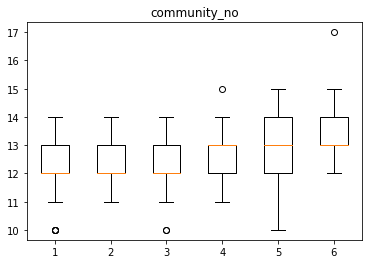

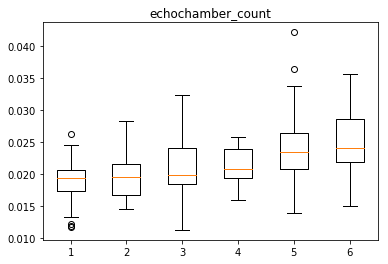

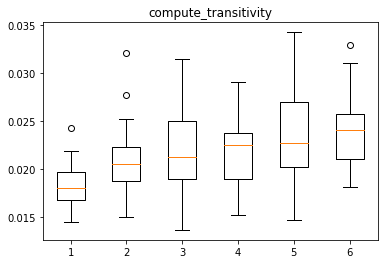

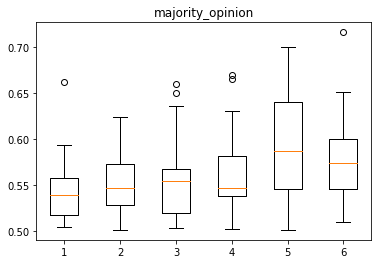

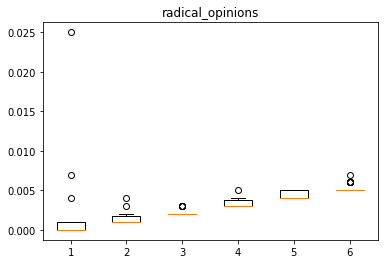

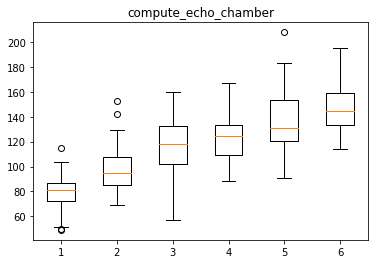

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_pickle("../Data/malicious_N.pkl")

m_0 = data.loc[data['malicious_N'] == 0]
m_1 = data.loc[data['malicious_N'] == 1]
m_2 = data.loc[data['malicious_N'] == 2]
m_3 = data.loc[data['malicious_N'] == 3]
m_4 = data.loc[data['malicious_N'] == 4]
m_5 = data.loc[data['malicious_N'] == 5]
print(m_0)
ouputs = ["community_no","echochamber_count","compute_transitivity","majority_opinion","radical_opinions","compute_echo_chamber"]
data_set = [m_0,m_1, m_2,m_3,m_4,m_5]

for output in ouputs:
    data_box = []
    for d in data_set:
        dat = d[output]
        data_box.append(dat)
    plt.boxplot(data_box)
    plt.title(output)
    plt.show()
    
    


In [2]:
malicious_op = list(range(0,6))
data_frames = []
all_data = []
for malicious in malicious_op:
    for i in range(30):
        print("malicious_N = ", malicious, "iters = ", i)
        network = Network(N=1000, no_of_neighbors=4, network_type=2, beta_component=.3, similarity_treshold=.16, social_influence=0.06, swingers=5, malicious_N=malicious, all_majority=False,opinions=2, echo_limit = 0.95, seed=1)
        for j in range(100):
            network.step()
        agent_preference = network.datacollector.get_model_vars_dataframe()
        data_frames.append(agent_preference)
    all_data.append(data_frames)

print(all_data)
to_save = pd.concat(all_data)
# all_data.to_pickle("/Data/malicious_N_time_majorityopinion.pkl")


[0, 1, 2, 3, 4, 5]
malicious_N =  0 iters =  0
malicious_N =  0 iters =  1
malicious_N =  0 iters =  2
malicious_N =  0 iters =  3
malicious_N =  0 iters =  4
malicious_N =  0 iters =  5
malicious_N =  0 iters =  6
malicious_N =  0 iters =  7
malicious_N =  0 iters =  8
malicious_N =  0 iters =  9
malicious_N =  0 iters =  10
malicious_N =  0 iters =  11
malicious_N =  0 iters =  12
malicious_N =  0 iters =  13
malicious_N =  0 iters =  14
malicious_N =  0 iters =  15
malicious_N =  0 iters =  16
malicious_N =  0 iters =  17
malicious_N =  0 iters =  18
malicious_N =  0 iters =  19
malicious_N =  0 iters =  20
malicious_N =  0 iters =  21
malicious_N =  0 iters =  22
malicious_N =  0 iters =  23
malicious_N =  0 iters =  24
malicious_N =  0 iters =  25
malicious_N =  0 iters =  26
malicious_N =  0 iters =  27
malicious_N =  0 iters =  28
malicious_N =  0 iters =  29
malicious_N =  1 iters =  0
malicious_N =  1 iters =  1
malicious_N =  1 iters =  2
malicious_N =  1 iters =  3
malicious

AttributeError: 'list' object has no attribute 'to_pickle'

In [25]:
import pickle

with open("./Data/Data_TimeSeries_MaliciousAgent.txt", "wb") as fp:   #Pickling
    pickle.dump(all_data, fp)

['percentage_majority_opinion', 'radical_opinions', 'compute_transitivity', 'compute_echo_chamber', 'echochamber_size', 'echochamber_count', 'malicious_N', 'self.step_no']


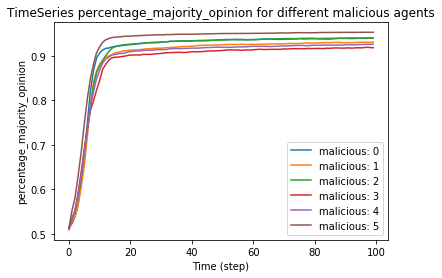

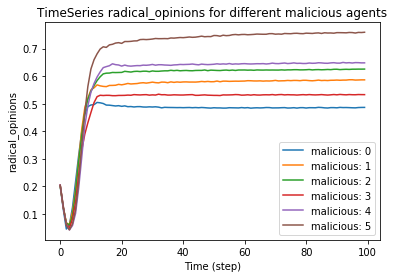

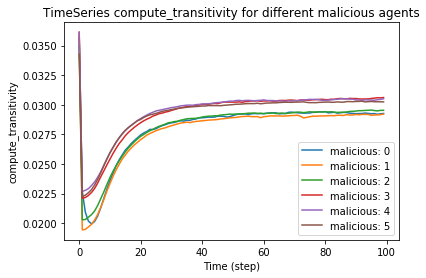

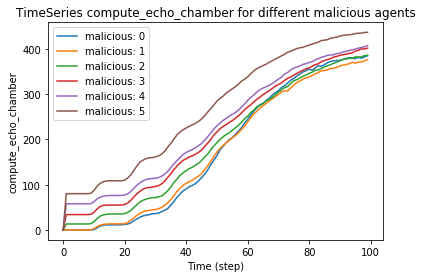

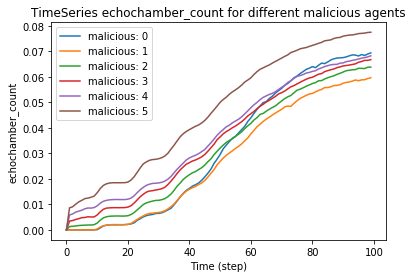

In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import pickle

model_reporters={                
    "radical_opinions": compute_radical_opinions,
#     "community_no": community_no,
    "majority_opinion": compute_majority_opinions,
    "silent_spiral": compute_silent_spiral,
    "compute_transitivity":compute_transitivity,
    "compute_echo_chamber":compute_echo_chamber,
    "echochamber_size":echochamber_size,
    "echochamber_count":echochamber_count
}
with open("./Data/Data_TimeSeries_MaliciousAgent.txt", "rb") as fp:   # Unpickling
      all_data = pickle.load(fp)

# data_array = []

# reporters = {}
reporters = list(all_data[0][0])
print(reporters)

for reporter in reporters:
    if reporter != 'echochamber_size' and reporter != 'self.step_no' and reporter != 'malicious_N':
    #     reporters[reporter] = df[reporter]

        for i, dat in enumerate(all_data):
            select_data = dat[i*30:i*30+30]
            df = pd.concat(select_data)
            df = df.groupby(['self.step_no']).mean()
            plt.plot(df.index, df[reporter], label = 'malicious: '+str(i))

        plt.legend()
        plt.xlabel('Time (step)')
        plt.ylabel(reporter)
        plt.title("TimeSeries "+reporter+' for different malicious agents')
        plt.savefig('./img/MaliciousTimeSeries_'+reporter+'.png')            

        plt.show()